In [7]:
import pandas as pd
df = pd.read_excel('data_stackedBar.xlsx')
def lidaIndices(df,colPlot,tipoGrupo, grupo):
    # lida com o problema de indices faltando
    idxDiferencas = df.loc[df[tipoGrupo]==grupo][colPlot].value_counts().index
    idxGeral = df[colPlot].value_counts().index
    mascara = idxGeral.isin(idxDiferencas)
    idxFaltando = list(df[colPlot].value_counts()[~mascara].index)
    diferencasGrupo = df.loc[df[tipoGrupo]==grupo][colPlot].value_counts()
    diferencasGeral = df[colPlot].value_counts()
    for idx in idxFaltando:
        diferencasGrupo[idx]=0   
    # ordenar os índices igual ao geral
    diferencasGrupo = diferencasGrupo.reindex(idxGeral)
    return [idxGeral, diferencasGrupo, diferencasGeral]
[idxGeral, diferencasGrupo, diferencasGeral] = lidaIndices(df,'diferencaProposta','alianca','Rubix')


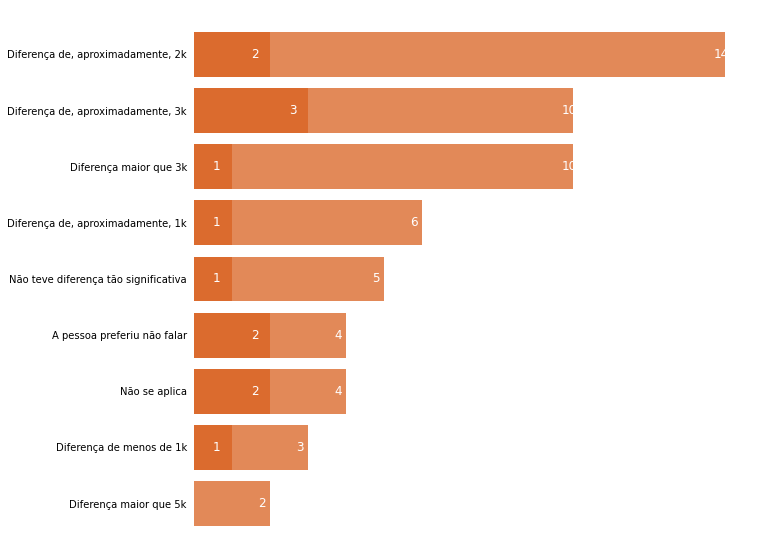

In [9]:
import stackedBar
a = stackedBar.stackedBar(diferencasGrupo,diferencasGeral,idxGeral)
# a.changeProperties(title='teste')
a.plot()